In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
from statsmodels.gam.api import GLMGam, BSplines
from scipy.interpolate import BSpline
from datetime import datetime 
import seaborn as sns

In [25]:
cols = pd.read_csv('../Datasets/far-csv-data/far_data_2024-02-21.csv', nrows=1).columns
df = pd.read_csv('../Datasets/far-csv-data/far_data_2024-02-21.csv', skiprows=15000, nrows=60000, names=cols)
df

,timestamp,cpu_system,boottime,Pool Size Time_P1,mem_free,Missed Buffers_P1,bytes_out,cpu_user,cpu_idle,Pool Size Data_P1,...,RetransSegs_rate,TCPLostRetransmit_rate,TCPForwardRetrans_rate,TotalRetrans,TCPSlowStartRetrans,RPCRetrans,TCPFastRetrans,TCPLostRetransmit,TCPForwardRetrans,RetransSegs
0,2024-02-21 08:10:15,2.040000,1.705517e+09,2037.689333,3.749076e+06,0.0,123235.934,0.860000,50.700000,11870.353333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-02-21 08:10:15,1.900000,1.705513e+09,2012.100000,3.882244e+06,0.0,141361.360,1.000000,43.100000,11897.573333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-02-21 08:10:15,1.800000,1.705517e+09,2047.442000,3.289443e+06,0.0,142608.980,1.000000,48.206667,11910.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-02-21 08:10:15,1.900000,1.705513e+09,2040.093333,3.722728e+06,0.0,123689.790,0.900000,42.400000,11801.740000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-02-21 08:10:15,1.800000,1.706625e+09,2031.986667,3.930216e+06,0.0,106320.130,0.900000,41.400000,11720.840000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2024-02-21 11:25:15,2.506667,1.705514e+09,2012.733333,3.195852e+06,0.0,88346.880,0.900000,41.160000,11710.193333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59996,2024-02-21 11:25:15,1.900000,1.706629e+09,2050.426667,3.374152e+06,0.0,118665.980,0.900000,52.100000,11635.840000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59997,2024-02-21 11:25:15,2.100000,1.705513e+09,2021.418667,3.521836e+06,0.0,111323.000,1.173333,48.913333,11689.753333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59998,2024-02-21 11:25:15,1.513333,1.705513e+09,2020.089333,3.055360e+06,0.0,115152.360,0.780000,58.106667,11699.033333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df = pd.read_csv('../Datasets/far-csv-data/far_data_2024-02-21.csv')
df

,timestamp,cpu_system,boottime,Pool Size Time_P1,mem_free,Missed Buffers_P1,bytes_out,cpu_user,cpu_idle,Pool Size Data_P1,...,RetransSegs_rate,TCPLostRetransmit_rate,TCPForwardRetrans_rate,TotalRetrans,TCPSlowStartRetrans,RPCRetrans,TCPFastRetrans,TCPLostRetransmit,TCPForwardRetrans,RetransSegs
0,2024-02-21 05:36:00,2.100000,NaN,NaN,NaN,0.0,NaN,1.006667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-02-21 05:36:15,2.100000,NaN,2038.710000,NaN,0.0,NaN,1.300000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-02-21 05:36:30,1.993333,NaN,2055.490000,NaN,0.0,NaN,1.300000,NaN,11795.033333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-02-21 05:36:45,1.806667,NaN,2049.026000,NaN,0.0,NaN,1.300000,NaN,11892.133333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-02-21 05:37:00,2.100000,1.705514e+09,2014.643333,NaN,0.0,NaN,1.110000,NaN,11854.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615581,2024-02-21 23:59:45,1.800000,1.706624e+09,2071.635000,7.869378e+06,NaN,133377.830000,NaN,55.8,11961.533333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615582,2024-02-21 23:59:45,2.950000,1.705514e+09,2067.843333,7.733784e+06,NaN,102922.470000,NaN,45.7,11944.233333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615583,2024-02-21 23:59:45,2.000000,1.705517e+09,2038.708333,7.864299e+06,NaN,119388.031667,1.000000,51.2,11771.550000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615584,2024-02-21 23:59:45,2.066667,1.705517e+09,2061.193333,7.175380e+06,NaN,156884.440000,NaN,53.7,11903.950000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# 2024-02-21 14:15:00 - 15:54:15
cols = pd.read_csv('../Datasets/far-csv-data/far_data_2024-02-21.csv', nrows=1).columns
df = pd.read_csv('../Datasets/far-csv-data/far_data_2024-02-21.csv', skiprows=167000, nrows=70000, names=cols)
df

,timestamp,cpu_system,boottime,Pool Size Time_P1,mem_free,Missed Buffers_P1,bytes_out,cpu_user,cpu_idle,Pool Size Data_P1,...,RetransSegs_rate,TCPLostRetransmit_rate,TCPForwardRetrans_rate,TotalRetrans,TCPSlowStartRetrans,RPCRetrans,TCPFastRetrans,TCPLostRetransmit,TCPForwardRetrans,RetransSegs
0,2024-02-21 14:15:00,1.700000,1.705517e+09,2007.350000,3.188263e+06,0.0,122184.460000,0.800000,49.680000,11781.120000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-02-21 14:15:00,1.706667,1.705513e+09,2036.800000,3.079868e+06,0.0,151191.270000,0.700000,54.500000,11920.640000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-02-21 14:15:00,1.900000,1.705517e+09,2026.926000,3.437360e+06,0.0,134518.780000,0.900000,46.700000,11805.920000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-02-21 14:15:00,1.900000,1.705513e+09,2023.378667,3.265698e+06,0.0,131119.030000,0.900000,43.100000,11788.540000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-02-21 14:15:00,2.046667,1.705514e+09,2022.940000,2.894676e+06,0.0,116706.870000,1.020000,44.400000,11832.260000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2024-02-21 15:54:15,1.706667,1.705517e+09,2060.550000,3.411280e+06,0.0,137737.000000,0.900000,47.600000,11992.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69996,2024-02-21 15:54:15,1.800000,1.705514e+09,2011.466667,2.604928e+06,0.0,135470.914667,0.800000,43.113333,11703.646667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69997,2024-02-21 15:54:15,1.706667,1.705517e+09,2023.700000,2.972288e+06,0.0,157888.237333,0.906667,53.700000,11773.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69998,2024-02-21 15:54:15,2.000000,1.705517e+09,2001.786667,3.351454e+06,0.0,116854.934667,1.200000,48.800000,11655.560000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# 2024-02-21 18:19:30 - 21:25:15
cols = pd.read_csv('../Datasets/far-csv-data/far_data_2024-02-21.csv', nrows=1).columns
df = pd.read_csv('../Datasets/far-csv-data/far_data_2024-02-21.csv', \
                skiprows=350000, \
                nrows=145000, \
                names=cols)
df

,timestamp,cpu_system,boottime,Pool Size Time_P1,mem_free,Missed Buffers_P1,bytes_out,cpu_user,cpu_idle,Pool Size Data_P1,...,RetransSegs_rate,TCPLostRetransmit_rate,TCPForwardRetrans_rate,TotalRetrans,TCPSlowStartRetrans,RPCRetrans,TCPFastRetrans,TCPLostRetransmit,TCPForwardRetrans,RetransSegs
0,2024-02-21 18:19:30,0.4,1.706625e+09,NaN,2.820857e+07,NaN,14760.330000,0.300000,99.200000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-02-21 18:19:30,0.0,1.705517e+09,NaN,2.849510e+07,NaN,29980.530000,0.400000,99.100000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-02-21 18:19:30,0.6,1.705513e+09,NaN,2.862604e+07,NaN,8257.380000,0.600000,98.200000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-02-21 18:19:30,0.2,1.705517e+09,NaN,2.876988e+07,NaN,982.500000,0.200000,99.600000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-02-21 18:19:30,0.1,1.706703e+09,NaN,2.923748e+07,NaN,4135.500000,0.100000,99.600000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144995,2024-02-21 21:25:15,1.9,1.705517e+09,2051.946667,9.108620e+06,4.0,118536.204000,0.886667,54.800000,11687.920000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144996,2024-02-21 21:25:15,2.1,1.706625e+09,2030.348000,9.360303e+06,0.0,142251.346000,1.020000,46.620000,11641.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144997,2024-02-21 21:25:15,1.7,1.705513e+09,2050.292000,7.851091e+06,3.0,141976.940000,0.600000,58.420000,11833.113333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144998,2024-02-21 21:25:15,0.4,1.705517e+09,2053.836667,6.422628e+06,0.0,110669.947333,0.200000,92.946667,11811.120000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# 2024-02-21 17:15:15 - 21:18:45
cols = pd.read_csv('../Datasets/far-csv-data/far_data_2024-02-21.csv', nrows=1).columns
df = pd.read_csv('../Datasets/far-csv-data/far_data_2024-02-21.csv', \
                skiprows=300000, \
                nrows=190000, \
                names=cols)
df

,timestamp,cpu_system,boottime,Pool Size Time_P1,mem_free,Missed Buffers_P1,bytes_out,cpu_user,cpu_idle,Pool Size Data_P1,...,RetransSegs_rate,TCPLostRetransmit_rate,TCPForwardRetrans_rate,TotalRetrans,TCPSlowStartRetrans,RPCRetrans,TCPFastRetrans,TCPLostRetransmit,TCPForwardRetrans,RetransSegs
0,2024-02-21 17:15:15,0.433333,1.705517e+09,2053.593333,1.308317e+06,0.0,127393.94,0.200000,92.700000,11911.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-02-21 17:15:15,1.600000,1.705517e+09,2029.843333,3.460912e+06,0.0,132265.56,0.800000,46.260000,11738.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-02-21 17:15:15,1.700000,1.705517e+09,2052.006667,3.430532e+06,0.0,95981.99,0.833333,55.200000,11906.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-02-21 17:15:15,1.900000,1.705517e+09,2007.360000,4.191988e+06,0.0,128861.04,1.100000,49.366667,11938.533333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-02-21 17:15:15,1.700000,1.705513e+09,2012.110000,2.993696e+06,0.0,149622.80,0.800000,52.800000,11672.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189995,2024-02-21 21:18:45,0.300000,NaN,2015.276667,NaN,4.0,NaN,0.200000,NaN,11659.453333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189996,2024-02-21 21:18:45,1.723333,NaN,2060.835000,NaN,2.0,NaN,0.800000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189997,2024-02-21 21:18:45,1.770000,NaN,2066.450000,NaN,0.0,NaN,0.840000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189998,2024-02-21 21:18:45,2.206667,NaN,2024.270000,NaN,4.0,NaN,1.206667,NaN,11704.643333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
cpu_idle = df.set_index('timestamp') \
                .pivot(columns='nodeId', values='cpu_idle') \
                .apply(lambda row: row.fillna(row.mean()), axis=0).T
cpu_idle

timestamp,2024-02-21 14:15:00,2024-02-21 14:15:15,2024-02-21 14:15:30,2024-02-21 14:15:45,2024-02-21 14:16:00,2024-02-21 14:16:15,2024-02-21 14:16:30,2024-02-21 14:16:45,2024-02-21 14:17:00,2024-02-21 14:17:15,...,2024-02-21 15:52:00,2024-02-21 15:52:15,2024-02-21 15:52:30,2024-02-21 15:52:45,2024-02-21 15:53:00,2024-02-21 15:53:15,2024-02-21 15:53:30,2024-02-21 15:53:45,2024-02-21 15:54:00,2024-02-21 15:54:15
nodeId,,,,,,,,,,,,,,,,,,,,,
novadaq-far-farm-06,99.200000,99.200000,99.200000,99.620000,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000,...,94.940000,93.10,94.806667,98.880000,96.40,98.380000,98.380000,99.70,99.700000,99.700000
novadaq-far-farm-07,99.700000,99.700000,99.700000,99.400000,99.200000,99.200000,99.200000,99.200000,99.200000,99.680000,...,99.060000,98.50,98.500000,98.033333,98.28,98.300000,98.300000,98.30,98.300000,99.504635
novadaq-far-farm-08,99.562922,99.400000,99.400000,99.400000,99.760000,100.000000,100.000000,100.000000,100.000000,100.000000,...,99.120000,99.12,98.600000,98.600000,98.60,96.826667,99.686667,99.90,99.900000,99.900000
novadaq-far-farm-09,99.670243,99.400000,99.400000,99.580000,99.700000,99.700000,99.700000,99.700000,99.700000,99.820000,...,99.900000,99.90,99.900000,99.900000,99.90,99.900000,99.900000,99.90,99.900000,99.900000
novadaq-far-farm-10,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000,98.940000,98.300000,98.300000,...,98.400000,98.40,99.706667,99.800000,99.80,99.800000,99.800000,99.80,99.893333,99.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
novadaq-far-farm-95,55.443073,54.700000,52.240000,53.840000,55.280000,54.800000,56.660000,56.040000,54.800000,54.800000,...,56.900000,56.90,53.540000,56.473333,56.70,51.660000,59.793333,59.10,59.100000,53.200000
novadaq-far-farm-96,56.660000,58.880000,59.400000,59.400000,55.440000,52.800000,52.800000,52.800000,54.340000,56.753333,...,53.680000,53.70,53.700000,53.700000,59.90,55.233333,54.900000,54.90,55.246667,55.246667
novadaq-far-farm-97,55.058926,55.058926,55.058926,55.058926,55.058926,55.058926,55.058926,55.058926,55.058926,55.058926,...,48.500000,48.50,55.686667,56.200000,56.20,56.200000,56.200000,56.76,56.800000,53.300000


In [7]:
print("Checking for NaN values after filling:", cpu_idle.isna().sum().sum())

Checking for NaN values after filling: 398


In [8]:
cpu_idle[cpu_idle.isna().any(axis=1)]

timestamp,2024-02-21 14:15:00,2024-02-21 14:15:15,2024-02-21 14:15:30,2024-02-21 14:15:45,2024-02-21 14:16:00,2024-02-21 14:16:15,2024-02-21 14:16:30,2024-02-21 14:16:45,2024-02-21 14:17:00,2024-02-21 14:17:15,...,2024-02-21 15:52:00,2024-02-21 15:52:15,2024-02-21 15:52:30,2024-02-21 15:52:45,2024-02-21 15:53:00,2024-02-21 15:53:15,2024-02-21 15:53:30,2024-02-21 15:53:45,2024-02-21 15:54:00,2024-02-21 15:54:15
nodeId,,,,,,,,,,,,,,,,,,,,,
novadaq-far-farm-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
cpu_idle = cpu_idle.dropna()
cpu_idle

timestamp,2024-02-21 14:15:00,2024-02-21 14:15:15,2024-02-21 14:15:30,2024-02-21 14:15:45,2024-02-21 14:16:00,2024-02-21 14:16:15,2024-02-21 14:16:30,2024-02-21 14:16:45,2024-02-21 14:17:00,2024-02-21 14:17:15,...,2024-02-21 15:52:00,2024-02-21 15:52:15,2024-02-21 15:52:30,2024-02-21 15:52:45,2024-02-21 15:53:00,2024-02-21 15:53:15,2024-02-21 15:53:30,2024-02-21 15:53:45,2024-02-21 15:54:00,2024-02-21 15:54:15
nodeId,,,,,,,,,,,,,,,,,,,,,
novadaq-far-farm-06,99.200000,99.200000,99.200000,99.620000,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000,...,94.940000,93.10,94.806667,98.880000,96.40,98.380000,98.380000,99.70,99.700000,99.700000
novadaq-far-farm-07,99.700000,99.700000,99.700000,99.400000,99.200000,99.200000,99.200000,99.200000,99.200000,99.680000,...,99.060000,98.50,98.500000,98.033333,98.28,98.300000,98.300000,98.30,98.300000,99.504635
novadaq-far-farm-08,99.562922,99.400000,99.400000,99.400000,99.760000,100.000000,100.000000,100.000000,100.000000,100.000000,...,99.120000,99.12,98.600000,98.600000,98.60,96.826667,99.686667,99.90,99.900000,99.900000
novadaq-far-farm-09,99.670243,99.400000,99.400000,99.580000,99.700000,99.700000,99.700000,99.700000,99.700000,99.820000,...,99.900000,99.90,99.900000,99.900000,99.90,99.900000,99.900000,99.90,99.900000,99.900000
novadaq-far-farm-10,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000,98.940000,98.300000,98.300000,...,98.400000,98.40,99.706667,99.800000,99.80,99.800000,99.800000,99.80,99.893333,99.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
novadaq-far-farm-95,55.443073,54.700000,52.240000,53.840000,55.280000,54.800000,56.660000,56.040000,54.800000,54.800000,...,56.900000,56.90,53.540000,56.473333,56.70,51.660000,59.793333,59.10,59.100000,53.200000
novadaq-far-farm-96,56.660000,58.880000,59.400000,59.400000,55.440000,52.800000,52.800000,52.800000,54.340000,56.753333,...,53.680000,53.70,53.700000,53.700000,59.90,55.233333,54.900000,54.90,55.246667,55.246667
novadaq-far-farm-97,55.058926,55.058926,55.058926,55.058926,55.058926,55.058926,55.058926,55.058926,55.058926,55.058926,...,48.500000,48.50,55.686667,56.200000,56.20,56.200000,56.200000,56.76,56.800000,53.300000


In [10]:
print("Checking for NaN values after filling:", cpu_idle.isna().sum().sum())

Checking for NaN values after filling: 0


In [42]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

def getPCs(X_ori):
    # Normalize the data (demean)
    baseline = X_ori.values
    mean_hat = baseline.mean(axis=0)
    demeaned = baseline - mean_hat

    # Scaling 
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(demeaned)

    # Perform PCA
    pca = PCA()
    pca.fit(scaled_data)
    scores = pca.transform(demeaned)

    explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
    npc = np.sum(explained_variance_ratio_cumsum < 0.9999) + 1
    print(f"Number of principal components: {npc}")

    # if npc < 2:
    #     raise ValueError("Not enough principal components to plot PC1 vs PC2.")

    # Create a DataFrame with PCA results
    npc = np.sum(np.cumsum(pca.explained_variance_ratio_) < 0.9999) + 1
    P_fin = pd.DataFrame()
    for k in range(3): 
        if k < npc:
            P_fin[f"PC{k+1}"] = scores[:, k]
        else:
            P_fin[f"PC{k+1}"] = np.nan
    # P_fin = pd.DataFrame(scores[:, :npc], columns=[f"PC{k+1}" for k in range(npc)])
    P_fin['Measurement'] = X_ori.index

    # Obtain clusters
    kmeans = KMeans(n_clusters=3)
    
    # print(P_fin[['PC1']].isna().any())

    if P_fin['PC2'].isna().all():
        kmeans = KMeans(n_clusters=3)
        # kmeans.fit(P_fin[['PC1']])
        P_fin['Cluster'] = kmeans.fit_predict(P_fin['PC1'].values.reshape(-1, 1))

    else:
        kmeans = KMeans(n_clusters=3)
        # kmeans.fit(P_fin[['PC1', 'PC2']])
        P_fin['Cluster'] = kmeans.fit_predict(P_fin[['PC1', 'PC2']])

    explained_var = pca.explained_variance_ratio_
    P_fin['ExpVariance1'] = explained_var[0] if len(explained_var) > 0 else np.nan
    P_fin['ExpVariance2'] = explained_var[1] if len(explained_var) > 1 else np.nan  
     
    return P_fin

Number of principal components: 157


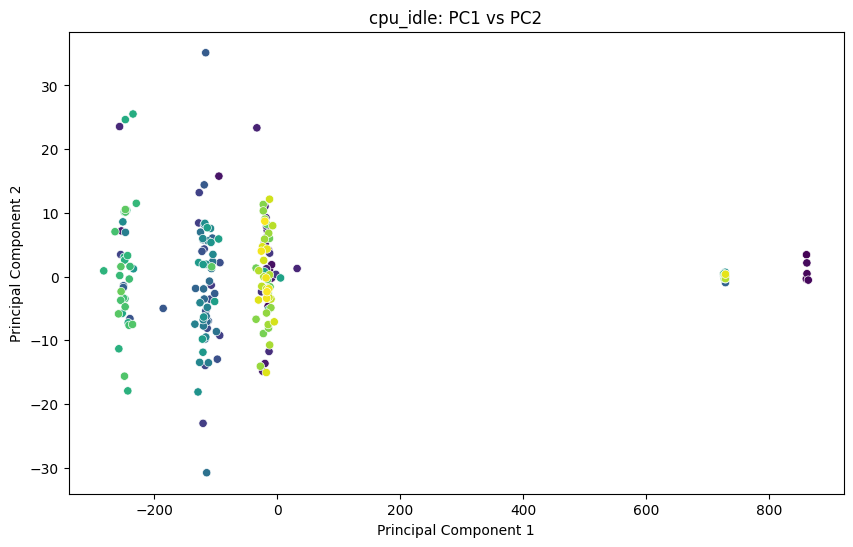

In [24]:
P_fin = getPCs(cpu_idle)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=P_fin[['PC1', 'PC2']], hue=P_fin['Measurement'], palette='viridis', legend=False)
plt.title('cpu_idle: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [25]:
P_fin

,PC1,PC2,PC3,Measurement,Cluster,ExpVariance
0,861.208649,3.434971,0.246216,novadaq-far-farm-06,1,9.685237e-01
1,860.852144,-0.354054,1.503911,novadaq-far-farm-07,1,7.838971e-04
2,862.002354,0.465270,0.542973,novadaq-far-farm-08,1,7.028942e-04
3,864.153360,-0.545922,0.411276,novadaq-far-farm-09,1,6.903638e-04
4,861.819467,2.151227,0.676442,novadaq-far-farm-10,1,6.694469e-04
...,...,...,...,...,...,...
183,-18.132666,-0.204562,-4.504111,novadaq-far-farm-95,2,1.591926e-07
184,-17.144749,-3.402894,4.879014,novadaq-far-farm-96,2,1.247371e-07
185,-25.818307,3.996625,0.894070,novadaq-far-farm-97,2,9.734070e-08
186,-20.135128,8.693688,-3.940635,novadaq-far-farm-98,2,6.785810e-08


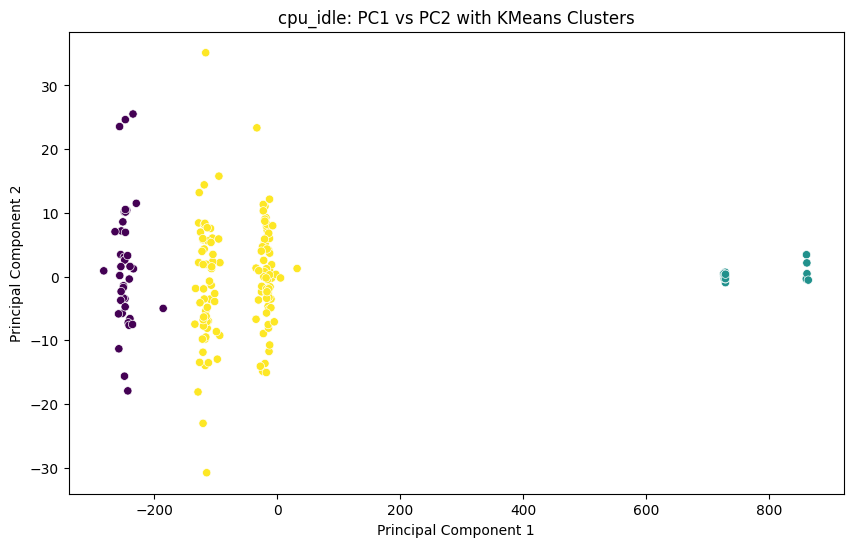

In [13]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=3)
kmeans.fit(P_fin[['PC1', 'PC2']])
P_fin['Cluster'] = kmeans.fit_predict(P_fin[['PC1', 'PC2']])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=P_fin[['PC1', 'PC2', 'Cluster']], hue='Cluster', palette='viridis', legend=False)
plt.title('cpu_idle: PC1 vs PC2 with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [83]:
cpu_idle_long = cpu_idle.copy()
cpu_idle_long = cpu_idle_long.reset_index().melt(id_vars='nodeId', var_name='timestamp', value_name='value')
cpu_idle_long['Cluster'] = cpu_idle_long['nodeId'].map(P_fin.set_index('Measurement')['Cluster'])
cpu_idle_long['timestamp'] = pd.to_datetime(cpu_idle_long['timestamp'])
cpu_idle_long['Cluster'] = cpu_idle_long['Cluster'].astype('category')
cpu_idle_long

,nodeId,timestamp,value,Cluster
0,novadaq-far-farm-06,2024-02-21 14:15:00,99.200000,1
1,novadaq-far-farm-07,2024-02-21 14:15:00,99.700000,1
2,novadaq-far-farm-08,2024-02-21 14:15:00,99.562922,1
3,novadaq-far-farm-09,2024-02-21 14:15:00,99.670243,1
4,novadaq-far-farm-10,2024-02-21 14:15:00,99.900000,1
...,...,...,...,...
74819,novadaq-far-farm-95,2024-02-21 15:54:15,53.200000,0
74820,novadaq-far-farm-96,2024-02-21 15:54:15,55.246667,0
74821,novadaq-far-farm-97,2024-02-21 15:54:15,53.300000,0
74822,novadaq-far-farm-98,2024-02-21 15:54:15,53.826667,0


In [92]:
cpu_idle_long.dtypes

nodeId               object
timestamp    datetime64[ns]
value               float64
Cluster            category
dtype: object

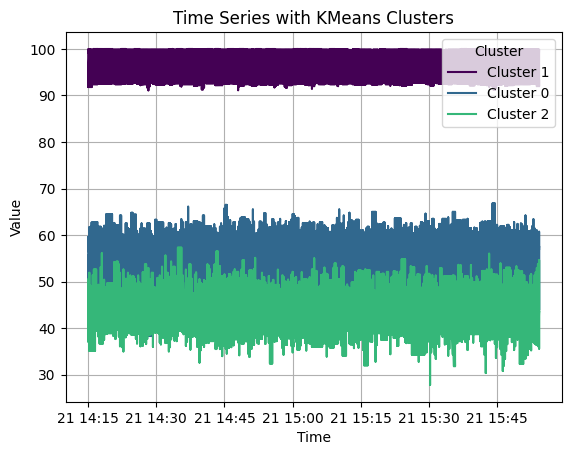

In [93]:
colors = {cluster: plt.cm.viridis(i / len(cpu_idle_long['Cluster'].unique())) for i, cluster in enumerate(cpu_idle_long['Cluster'].unique())}
for cluster in cpu_idle_long['Cluster'].unique():
    subset = cpu_idle_long[cpu_idle_long['Cluster'] == cluster]
    plt.plot(subset['timestamp'].to_numpy(), subset['value'].to_numpy(), color=colors[cluster], label=f'Cluster {cluster}')

plt.title('Time Series with KMeans Clusters')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Number of principal components: 1


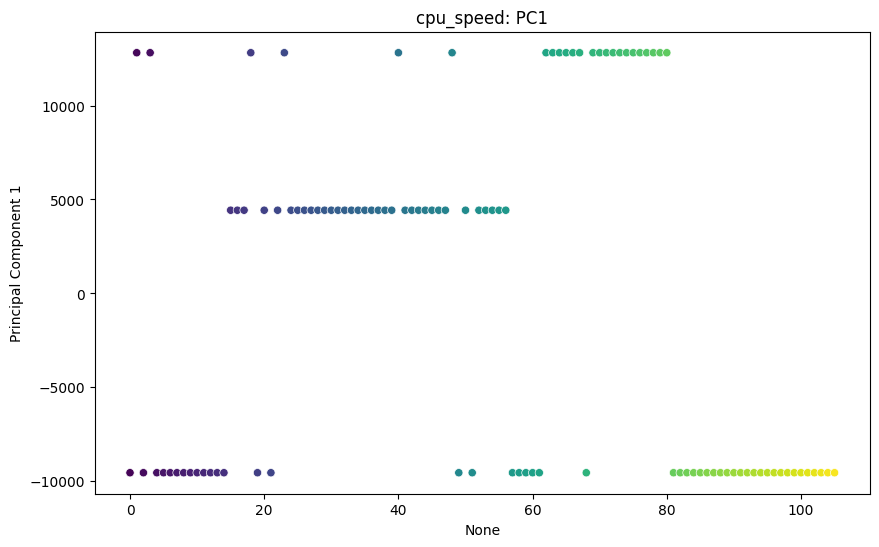

In [188]:
P_fin = getPCs(cpu_speed)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=P_fin.index, y='PC1', data=P_fin[['PC1']], hue=P_fin['Measurement'], palette='viridis', legend=False)
plt.title('cpu_speed: PC1')
plt.ylabel('Principal Component 1')
plt.show()

In [187]:
P_fin.index

RangeIndex(start=0, stop=106, step=1)

In [49]:
cpu_speed = df.set_index('timestamp') \
                .pivot(columns='nodeId', values='cpu_speed') \
                .apply(lambda row: row.fillna(row.mean()), axis=0).T
cpu_speed

timestamp,2024-02-21 14:15:00,2024-02-21 14:15:15,2024-02-21 14:15:30,2024-02-21 14:15:45,2024-02-21 14:16:00,2024-02-21 14:16:15,2024-02-21 14:16:30,2024-02-21 14:16:45,2024-02-21 14:17:00,2024-02-21 14:17:15,...,2024-02-21 15:52:00,2024-02-21 15:52:15,2024-02-21 15:52:30,2024-02-21 15:52:45,2024-02-21 15:53:00,2024-02-21 15:53:15,2024-02-21 15:53:30,2024-02-21 15:53:45,2024-02-21 15:54:00,2024-02-21 15:54:15
nodeId,,,,,,,,,,,,,,,,,,,,,
novadaq-far-farm-06,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,...,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0
novadaq-far-farm-07,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,...,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
novadaq-far-farm-08,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,...,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0
novadaq-far-farm-09,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,...,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0
novadaq-far-farm-10,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,...,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
novadaq-far-farm-95,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,...,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0
novadaq-far-farm-96,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,...,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0
novadaq-far-farm-97,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,...,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0,2800.0


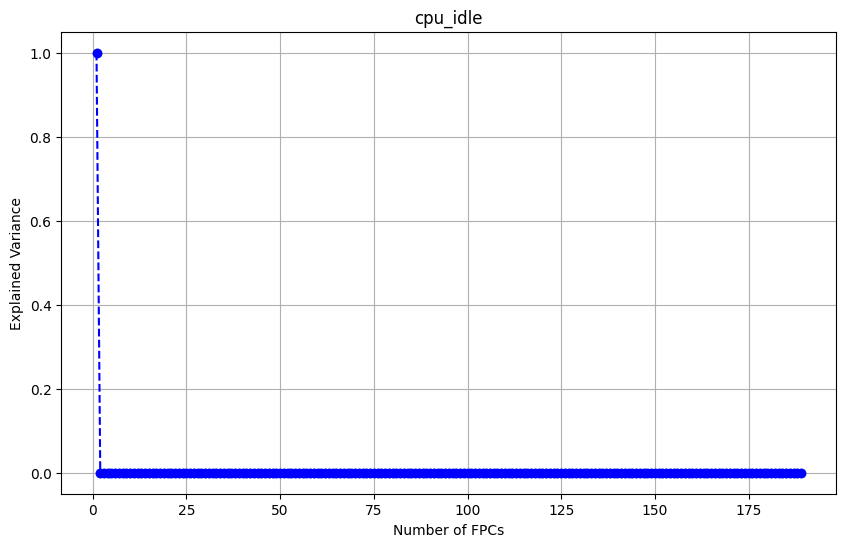

In [50]:
from sklearn.decomposition import PCA

baseline = cpu_speed.values
mean_hat = baseline.mean(axis=0)
demeaned = baseline - mean_hat
pca = PCA()
pca.fit(demeaned)
explained_var = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(10, 6))
plt.scatter(range(1, len(explained_var) + 1), explained_var, alpha=0.7)
plt.plot(range(1, len(explained_var) + 1), explained_var, linestyle='--', marker='o', color='b')
plt.ylabel('Explained Variance')
plt.xlabel('Number of FPCs')
plt.title('cpu_speed')
plt.grid(True)
plt.show()

In [51]:
explained_var

array([1.00000000e+00, 3.38463143e-28, 1.94294684e-29, 1.73947864e-29,
       8.89219008e-31, 9.98402083e-33, 9.98402083e-33, 9.98402083e-33,
       9.98402083e-33, 9.98402083e-33, 9.98402083e-33, 9.98402083e-33,
       9.98402083e-33, 9.98402083e-33, 9.98402083e-33, 9.98402083e-33,
       9.98402083e-33, 9.98402083e-33, 9.98402083e-33, 9.98402083e-33,
       9.98402083e-33, 9.98402083e-33, 9.98402083e-33, 9.98402083e-33,
       9.98402083e-33, 9.98402083e-33, 9.98402083e-33, 9.98402083e-33,
       9.98402083e-33, 9.98402083e-33, 9.98402083e-33, 9.98402083e-33,
       9.98402083e-33, 9.98402083e-33, 9.98402083e-33, 9.98402083e-33,
       9.98402083e-33, 9.98402083e-33, 9.98402083e-33, 9.98402083e-33,
       9.98402083e-33, 9.98402083e-33, 9.98402083e-33, 9.98402083e-33,
       9.98402083e-33, 9.98402083e-33, 9.98402083e-33, 9.98402083e-33,
       9.98402083e-33, 9.98402083e-33, 9.98402083e-33, 9.98402083e-33,
       9.98402083e-33, 9.98402083e-33, 9.98402083e-33, 9.98402083e-33,
      

In [43]:
from pygam import GAM, s
from scipy.interpolate import BSpline, splrep, splev

def preprocess(df, value_column):
    return df.loc[:, ['timestamp', 'nodeId', value_column]] \
             .pivot_table(index='timestamp', columns='nodeId', values=value_column) \
             .apply(lambda row: row.fillna(row.mean()), axis=0).T

def smooth_gam(df):
    if (len(df) == 0):
        return df
    x = np.arange(len(df))
    gam = GAM(s(0)).fit(x, df)
    smoothed = gam.predict(x)
    return pd.Series(smoothed, index=df.index)

def smooth_bspline(df, k=3, s=0.0):
    if len(df) < k + 1:
        return df
    x = np.arange(len(df))
    t, c, k = splrep(x, df, k=k, s=s)
    smoothed = splev(x, (t, c, k))
    return pd.Series(smoothed, index=df.index)

cols = ['cpu_idle', 'cpu_nice', 'cpu_system', 'cpu_aidle', 'cpu_num', 'cpu_speed', 'cpu_wio', 
            'bytes_in', 'bytes_out', 'disk_free', 'disk_total', 'part_max_used', 'mem_buffers', 
            'mem_cached', 'mem_free', 'mem_shared', 'mem_total', 'swap_total', 'swap_free', 
            'proc_total', 'boottime', 'load_fifteen', 'load_five', 'load_one']

# Process each DataFrame
# dataframes = [preprocess(df, col) for col in cols]

# for i in range(len(dataframes)):
#     print(f'{cols[i]} NaN values: {dataframes[i].isna().sum().sum()}')

Number of principal components: 157
Number of principal components: 157
Number of principal components: 170
Number of principal components: 1
Number of principal components: 1


/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Number of principal components: 1
Number of principal components: 179
Number of principal components: 72
Number of principal components: 180
Number of principal components: 1
Number of principal components: 1
Number of principal components: 1
Number of principal components: 4
Number of principal components: 6
Number of principal components: 1


/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Number of principal components: 1
Number of principal components: 1
Number of principal components: 1


/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Number of principal components: 1
Number of principal components: 63
Number of principal components: 1
Number of principal components: 22
Number of principal components: 65
Number of principal components: 132


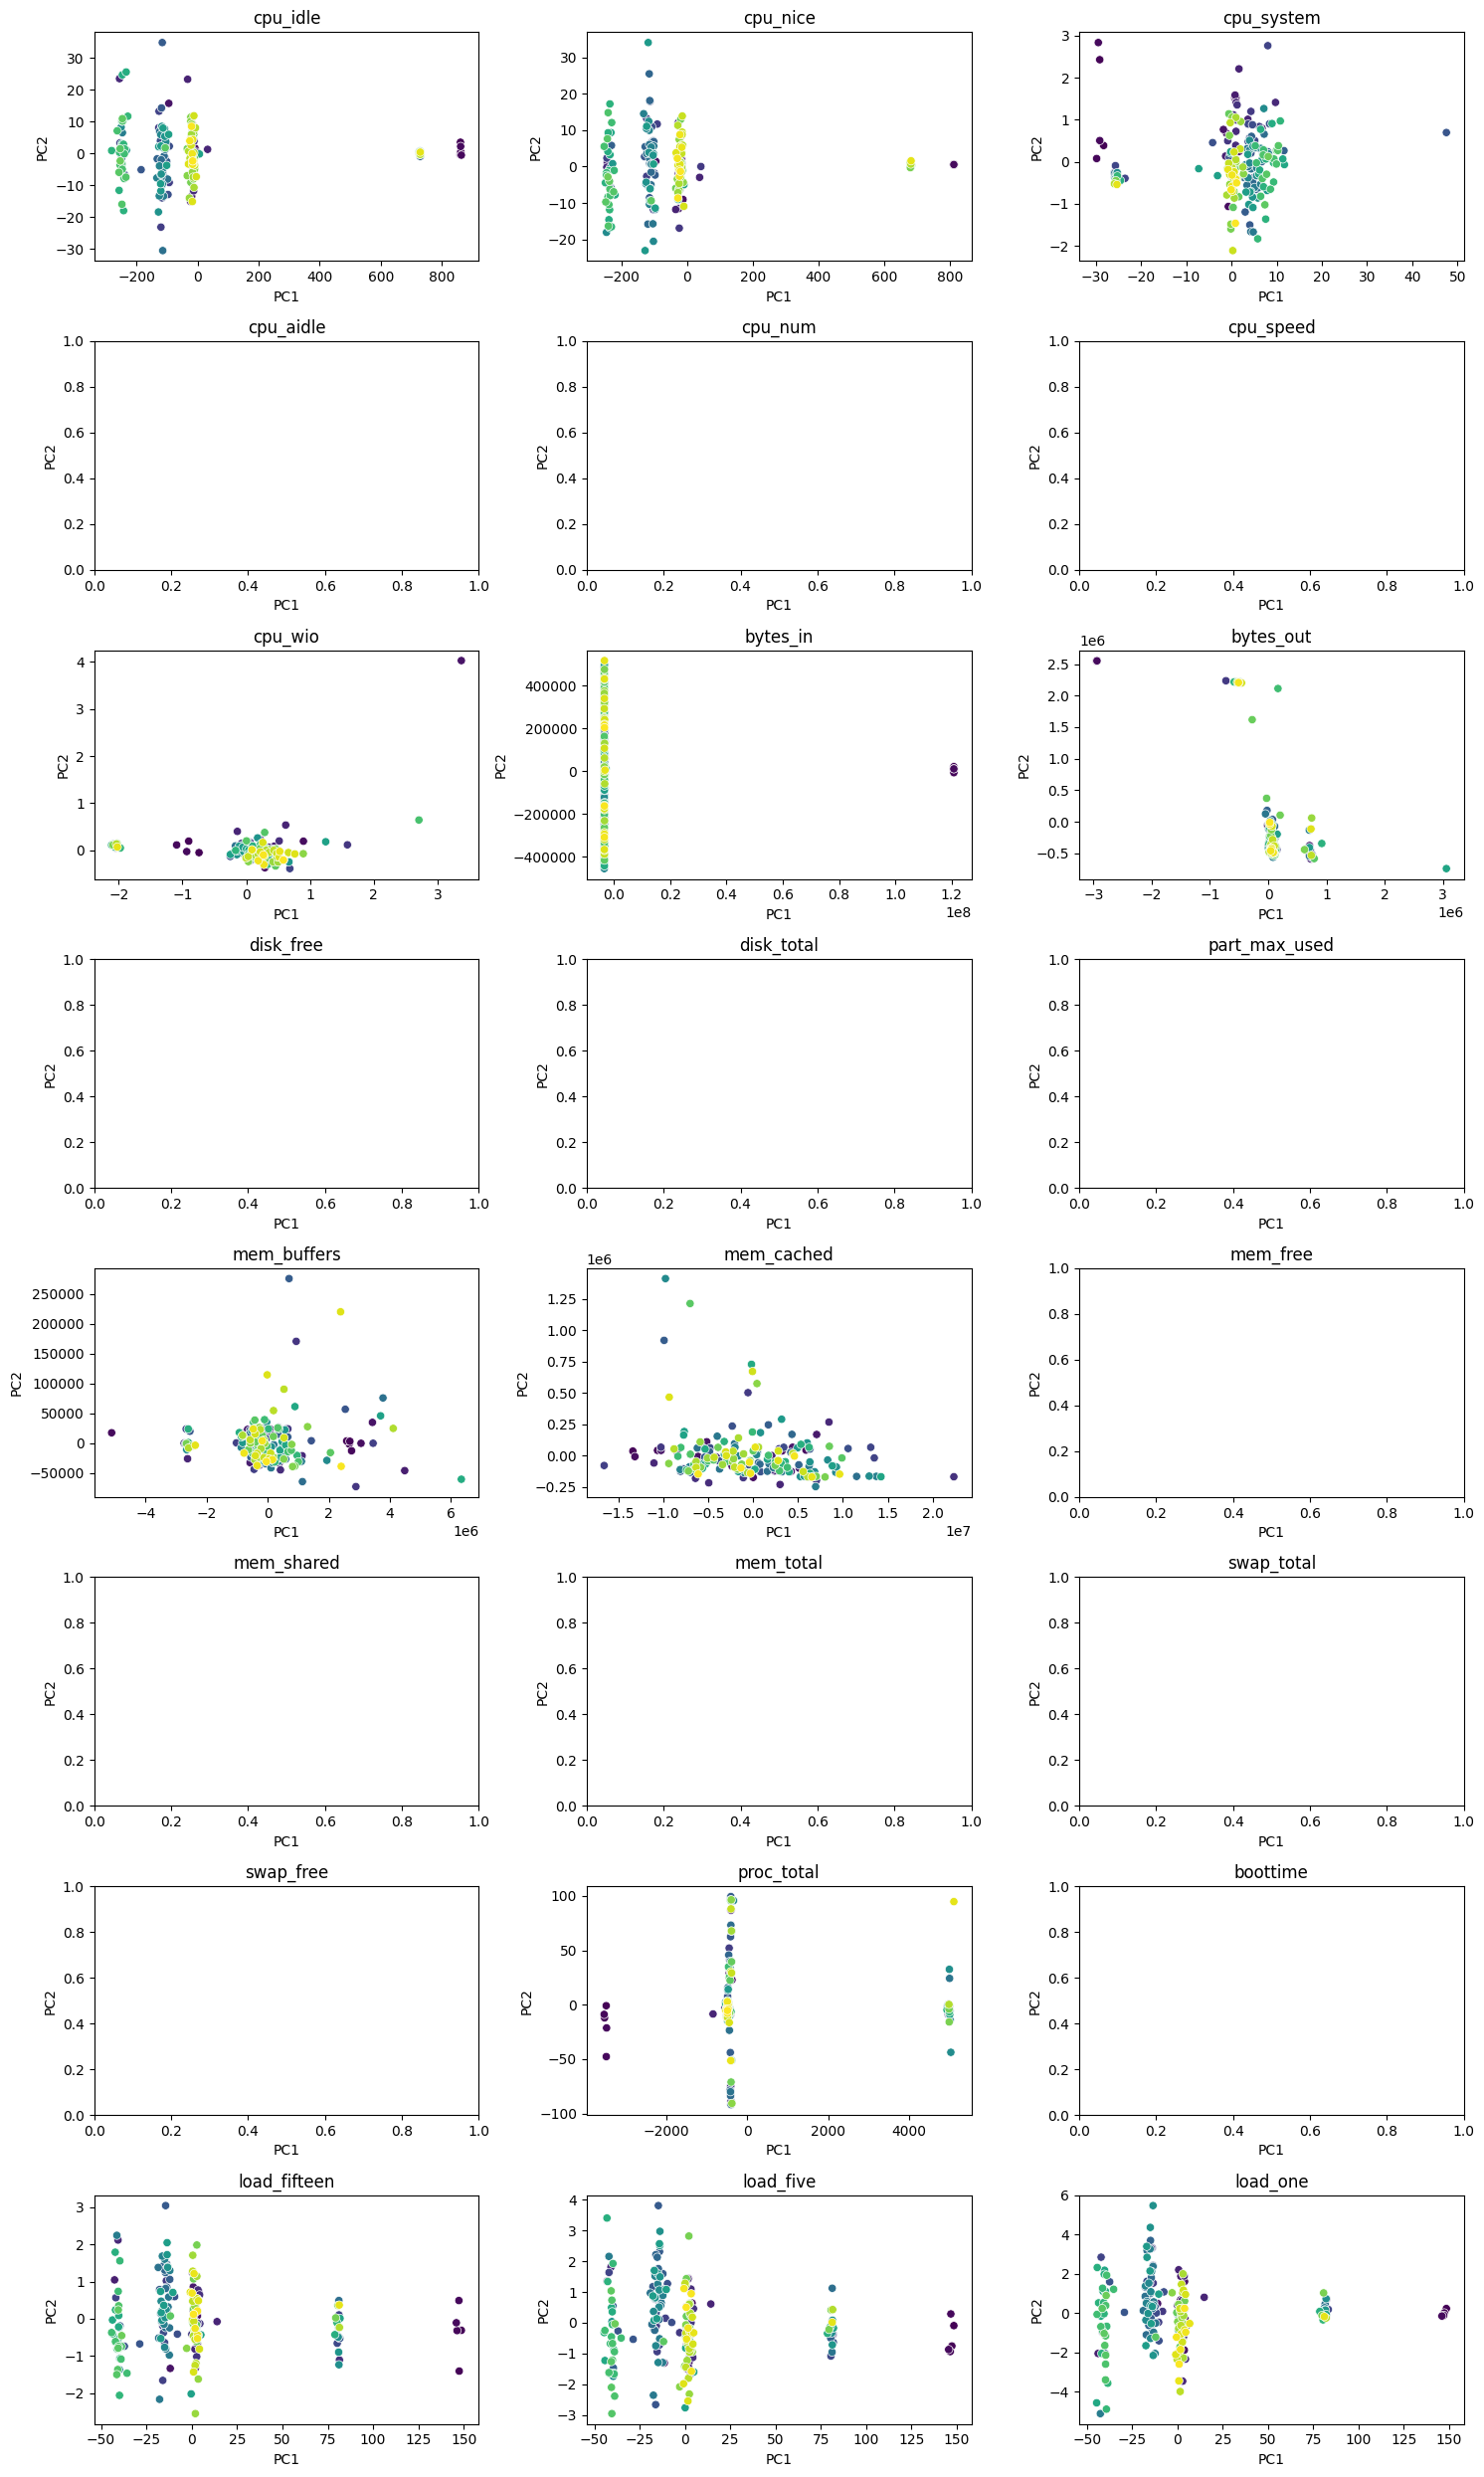

In [13]:
fig, axs = plt.subplots(8, 3, figsize=(15, 25))
axs = axs.flatten()

for i, (ax, df, col_name) in enumerate(zip(axs, dataframes, cols)):
    try:
        P_fin = getPCs(df)
        if 'PC1' in P_fin.columns and 'PC2' in P_fin.columns:
            sns.scatterplot(x='PC1', y='PC2', data=P_fin, hue='Measurement', ax=ax, palette='viridis', legend=False)
            ax.set_title(col_name)
            ax.set_xlabel('PC1')
            ax.set_ylabel('PC2')
        else:
            P_fin_r = P_fin.reset_index()
            sns.scatterplot(x='index', y='PC1', data=P_fin_r, hue='Measurement', ax=ax, palette='viridis', legend=False)
            ax.set_title(f"{col_name}: PC1")
            ax.set_ylabel('PC1')
    except ValueError as e:
        ax.set_title(f"{col_name}:\n {str(e)}")
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
    except Exception as e:
        ax.set_title(f"{col_name}: Error")
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        print(f"Error processing {col_name}:\n {e}")

plt.tight_layout()
plt.show()

In [172]:
df

,timestamp,cpu_system,boottime,Pool Size Time_P1,mem_free,Missed Buffers_P1,bytes_out,cpu_user,cpu_idle,Pool Size Data_P1,...,RetransSegs_rate,TCPLostRetransmit_rate,TCPForwardRetrans_rate,TotalRetrans,TCPSlowStartRetrans,RPCRetrans,TCPFastRetrans,TCPLostRetransmit,TCPForwardRetrans,RetransSegs
0,2024-02-21 14:15:00,1.700000,1.705517e+09,2007.350000,3.188263e+06,0.0,122184.460000,0.800000,49.680000,11781.120000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-02-21 14:15:00,1.706667,1.705513e+09,2036.800000,3.079868e+06,0.0,151191.270000,0.700000,54.500000,11920.640000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-02-21 14:15:00,1.900000,1.705517e+09,2026.926000,3.437360e+06,0.0,134518.780000,0.900000,46.700000,11805.920000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-02-21 14:15:00,1.900000,1.705513e+09,2023.378667,3.265698e+06,0.0,131119.030000,0.900000,43.100000,11788.540000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-02-21 14:15:00,2.046667,1.705514e+09,2022.940000,2.894676e+06,0.0,116706.870000,1.020000,44.400000,11832.260000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2024-02-21 15:54:15,1.706667,1.705517e+09,2060.550000,3.411280e+06,0.0,137737.000000,0.900000,47.600000,11992.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69996,2024-02-21 15:54:15,1.800000,1.705514e+09,2011.466667,2.604928e+06,0.0,135470.914667,0.800000,43.113333,11703.646667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69997,2024-02-21 15:54:15,1.706667,1.705517e+09,2023.700000,2.972288e+06,0.0,157888.237333,0.906667,53.700000,11773.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69998,2024-02-21 15:54:15,2.000000,1.705517e+09,2001.786667,3.351454e+06,0.0,116854.934667,1.200000,48.800000,11655.560000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Number of principal components: 183
Number of principal components: 168
Number of principal components: 186
Number of principal components: 6
Number of principal components: 1


/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Number of principal components: 1
Number of principal components: 192
Number of principal components: 165
Number of principal components: 192
Number of principal components: 1
Number of principal components: 1
Number of principal components: 1
Number of principal components: 2
Number of principal components: 81
Number of principal components: 27


/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Number of principal components: 1
Number of principal components: 1
Number of principal components: 1


/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Number of principal components: 1
Number of principal components: 119
Number of principal components: 1
Number of principal components: 130
Number of principal components: 144
Number of principal components: 179


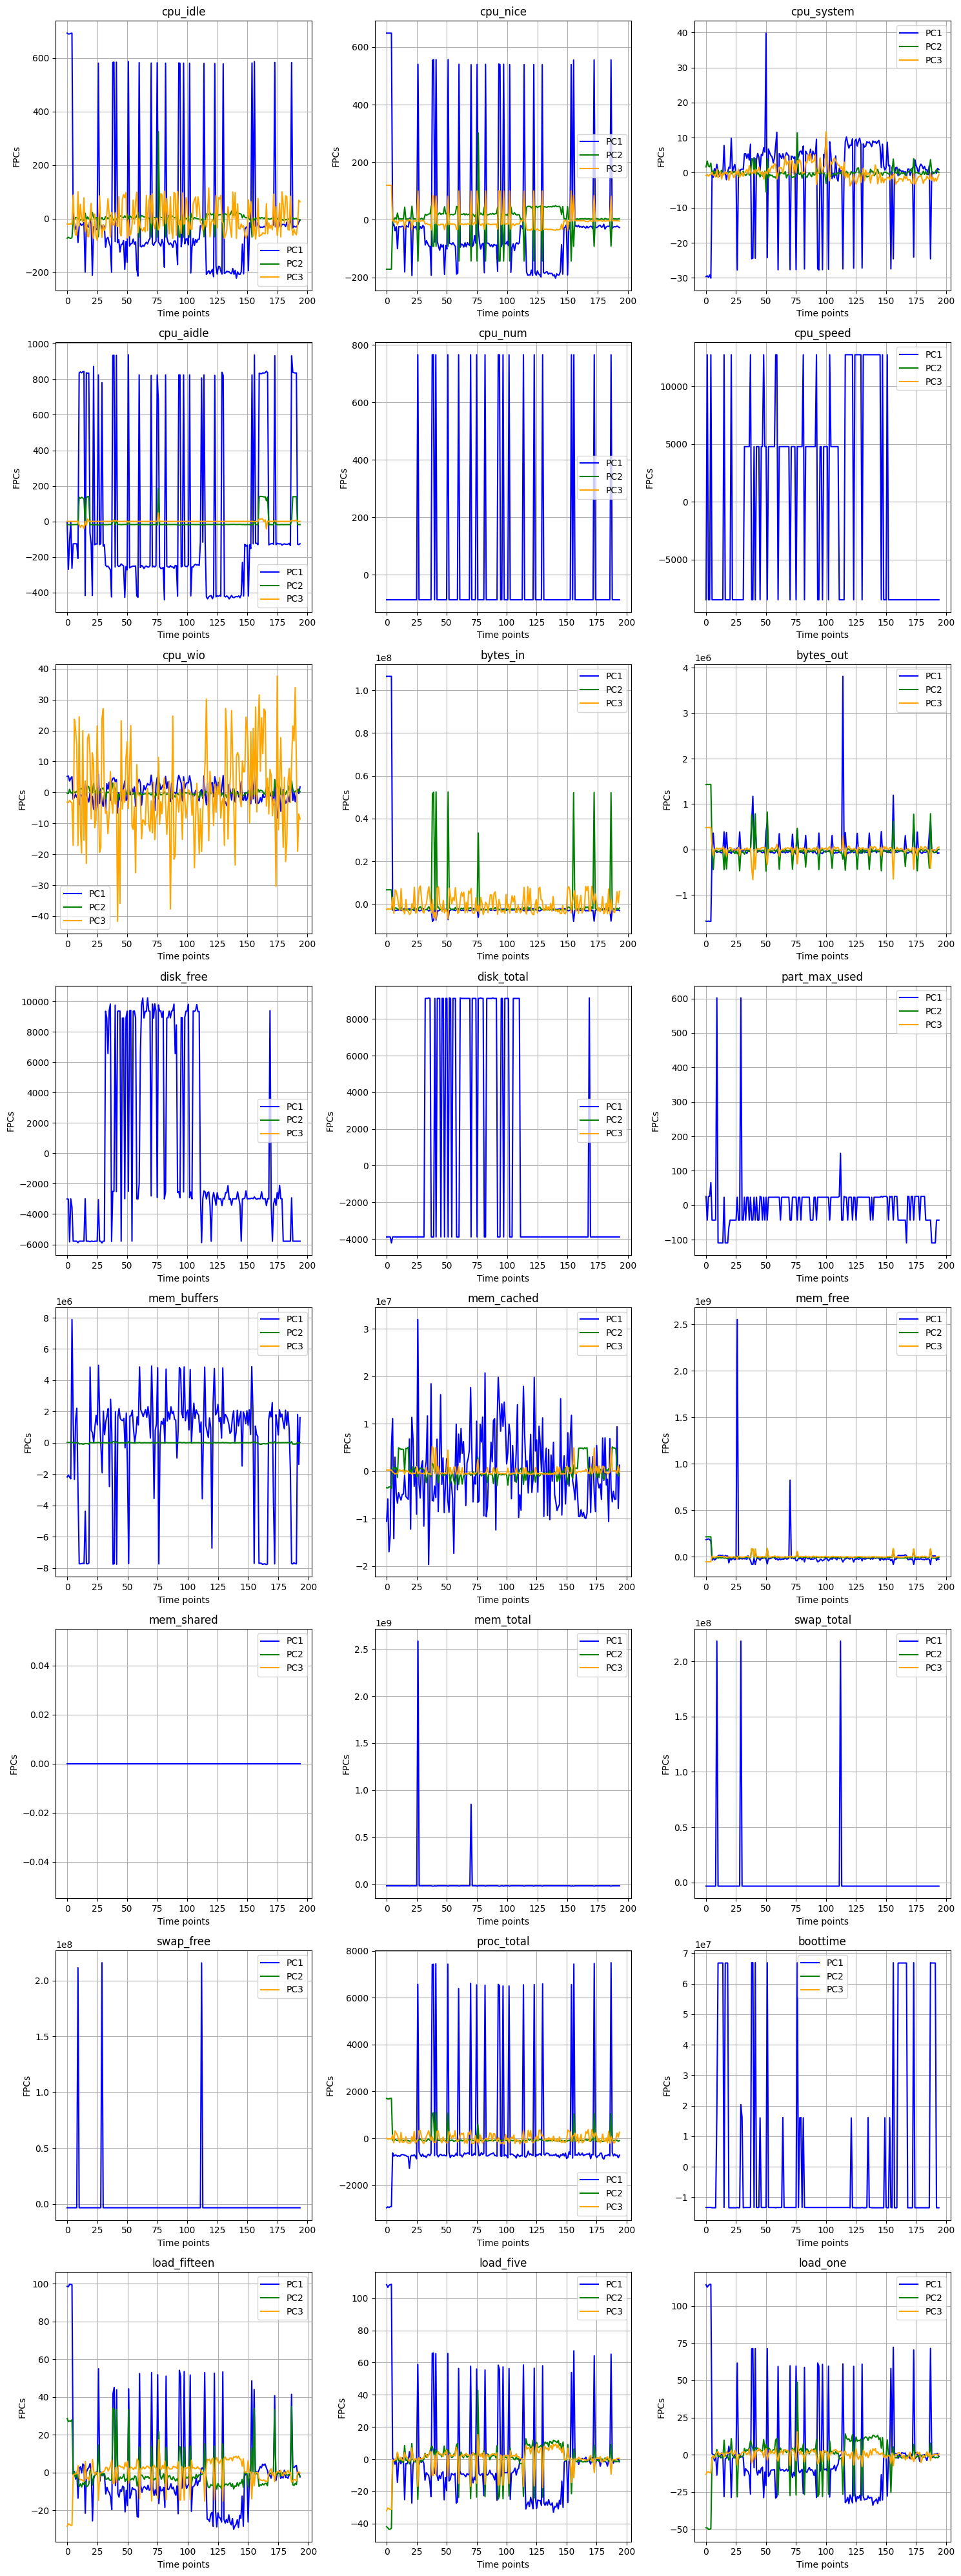

In [38]:
num_plots = len(dataframes)
num_rows = (num_plots + 2) // 3  # Calculate number of rows needed
fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
axs = axs.flatten()  # Flatten to simplify indexing

for i, (ax, df, col_name) in enumerate(zip(axs, dataframes, cols)):
    try:
        P_fin = getPCs(df)

        # Check if enough principal components are available
        if 'PC1' in P_fin.columns and 'PC2' in P_fin.columns and 'PC3' in P_fin.columns:
            P_fin['Col'] = col_name
            P_fin['PC1_smooth_bspline'] = smooth_bspline(P_fin['PC1'].dropna())
            P_fin['PC2_smooth_bspline'] = smooth_bspline(P_fin['PC2'].dropna())
            P_fin['PC3_smooth_bspline'] = smooth_bspline(P_fin['PC3'].dropna())

            P_fin[['PC1_smooth_bspline', 'PC2_smooth_bspline', 'PC3_smooth_bspline']].plot(ax=ax, color=['blue', 'green', 'orange'])
            ax.set_title(f'{col_name}')
            ax.set_xlabel('Time points')
            ax.set_ylabel('FPCs')
            ax.legend(['PC1', 'PC2', 'PC3'])
            ax.grid(True)
        else:
            ax.set_title(f"{col_name}: Not enough principal components")
            ax.set_xlabel('Time points')
            ax.set_ylabel('FPCs')
            ax.grid(True)
            
    except Exception as e:
        ax.set_title(f"{col_name}: Error")
        ax.set_xlabel('Time points')
        ax.set_ylabel('FPCs')
        ax.grid(True)
        print(f"Error processing {col_name}: {e}")

plt.tight_layout()
plt.show()

In [116]:
P_fin

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC85,PC86,PC87,PC88,PC89,PC90,Measurement,Col,PC1_smooth_bspline,PC2_smooth_bspline
0,207.556777,0.329877,0.165490,0.499301,0.043250,0.130761,-0.050497,0.643157,-0.453270,-0.310820,...,-0.123241,0.183033,0.204552,0.187272,0.192687,-0.057723,novadaq-far-farm-06,load_one,207.556777,0.329877
1,207.535545,-0.012010,0.728429,0.367307,-0.234552,-0.373807,-0.222042,0.188877,-0.208587,-0.555442,...,-0.276375,-0.026629,0.117856,-0.151536,-0.257506,-0.174092,novadaq-far-farm-07,load_one,207.535545,-0.012010
2,208.193036,-0.123272,0.294260,0.404290,0.125001,-0.167127,-0.040329,0.287013,-0.316302,-0.261001,...,-0.226895,0.154519,0.115501,0.150677,0.046583,-0.131920,novadaq-far-farm-09,load_one,208.193036,-0.123272
3,207.577375,-0.589257,0.370905,0.581017,0.221157,-0.257000,-0.234859,0.601165,-0.066515,-0.075422,...,-0.122653,0.205195,0.230846,0.074183,-0.205496,-0.124597,novadaq-far-farm-10,load_one,207.577375,-0.589257
4,6.342904,-0.178291,0.191392,-0.694612,-0.132374,-0.411645,0.607599,-1.098666,0.134132,0.794050,...,0.929544,0.274626,-0.293106,-0.181385,0.064742,-0.022601,novadaq-far-farm-101,load_one,6.342904,-0.178291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,114.014024,0.568197,0.104812,0.652054,0.575301,0.596296,0.367561,0.236502,0.318919,-0.125294,...,0.243098,-0.290494,0.386346,-0.707065,0.227298,-0.036357,novadaq-far-farm-92,load_one,114.014024,0.568197
102,3.179233,1.083702,-1.872688,-0.560056,1.997476,1.124664,-1.480485,1.010367,0.506868,-1.436447,...,-0.504973,0.027364,-0.346013,-0.040350,-0.120333,-0.618712,novadaq-far-farm-94,load_one,3.179233,1.083702
103,2.987640,-0.972757,1.868604,2.293099,-0.052926,0.317684,1.354983,-0.864279,2.525423,-1.436072,...,0.372872,0.091897,0.007404,0.094566,-0.244097,-0.062685,novadaq-far-farm-95,load_one,2.987640,-0.972757
104,0.994504,1.535311,-2.002350,2.890244,0.619185,-1.959619,0.540821,-0.473703,-0.015204,0.938303,...,0.155063,-0.097464,0.173500,-0.007400,0.103759,-0.045811,novadaq-far-farm-98,load_one,0.994504,1.535311


Number of principal components: 183
Number of principal components: 168
Number of principal components: 186
Number of principal components: 6
Number of principal components: 1


/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Number of principal components: 1
Number of principal components: 192
Number of principal components: 165
Number of principal components: 192
Number of principal components: 1
Number of principal components: 1
Number of principal components: 1
Number of principal components: 2
Number of principal components: 81
Number of principal components: 27


/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/pygam/pygam.py:806: RuntimeWarning: divide by zero encountered in scalar divide
  diff = np.linalg.norm(self.coef_ - coef_new) / np.linalg.norm(coef_new)
/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/pygam/pygam.py:806: RuntimeWarning: invalid value encountered in scalar divide
  diff = np.linalg.norm(self.coef_ - coef_new) / np.linalg.norm(coef_new)


Number of principal components: 1


/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/pygam/distributions.py:199: RuntimeWarning: invalid value encountered in divide
  dev /= self.scale
/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/pygam/pygam.py:1292: RuntimeWarning: invalid value encountered in scalar divide
  score = score / rank


did not converge
Number of principal components: 1
Number of principal components: 1


/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Number of principal components: 1
Number of principal components: 119
Number of principal components: 1
Number of principal components: 130
Number of principal components: 144
Number of principal components: 179


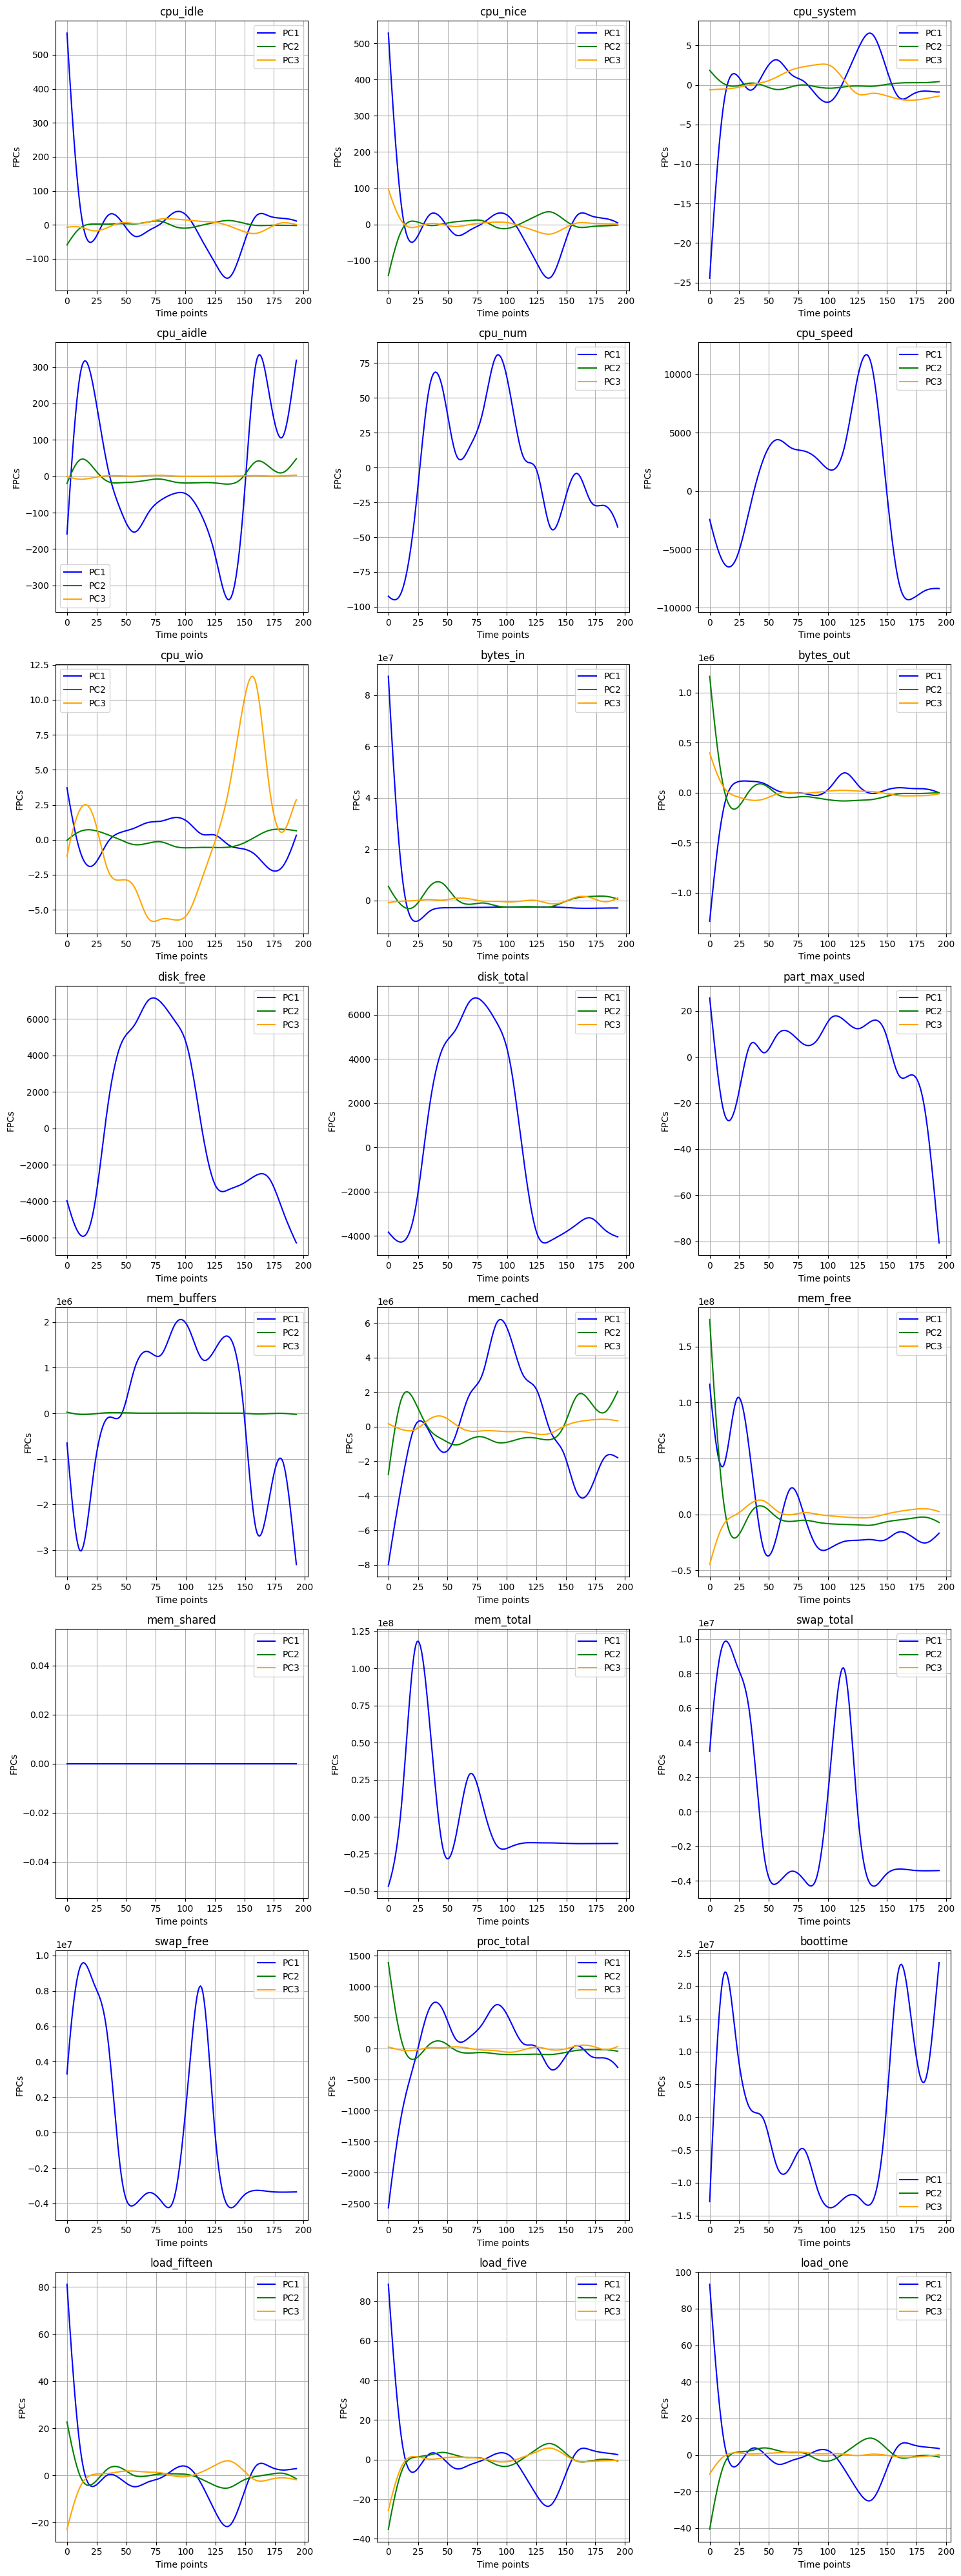

In [39]:
from pygam import GAM, s

def smooth_gam(df):
    if (len(df) == 0):
        return df
    x = np.arange(len(df))
    gam = GAM(s(0)).fit(x, df)
    smoothed = gam.predict(x)
    return pd.Series(smoothed, index=df.index)

num_plots = len(dataframes)
num_rows = (num_plots + 2) // 3  # Calculate number of rows needed
fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
axs = axs.flatten()  # Flatten to simplify indexing

for i, (ax, df, col_name) in enumerate(zip(axs, dataframes, cols)):
    try:
        P_fin = getPCs(df)

        # Check if enough principal components are available
        if 'PC1' in P_fin.columns and 'PC2' in P_fin.columns and 'PC3' in P_fin.columns:
            P_fin['PC1_smooth_gam'] = smooth_gam(P_fin['PC1'].dropna())
            P_fin['PC2_smooth_gam'] = smooth_gam(P_fin['PC2'].dropna())
            P_fin['PC3_smooth_gam'] = smooth_gam(P_fin['PC3'].dropna())

            P_fin[['PC1_smooth_gam', 'PC2_smooth_gam', 'PC3_smooth_gam']].plot(ax=ax, color=['blue', 'green', 'orange'])
            ax.set_title(f'{col_name}')
            ax.set_xlabel('Time points')
            ax.set_ylabel('FPCs')
            ax.legend(['PC1', 'PC2', 'PC3'])
            ax.grid(True)
        else:
            ax.set_title(f"{col_name}: Not enough principal components")
            ax.set_xlabel('Time points')
            ax.set_ylabel('FPCs')
            ax.grid(True)
            
    except Exception as e:
        ax.set_title(f"{col_name}: Error")
        ax.set_xlabel('Time points')
        ax.set_ylabel('FPCs')
        ax.grid(True)
        print(f"Error processing {col_name}: {e}")

plt.tight_layout()
plt.show()

In [59]:
cols = ['cpu_idle', 'cpu_nice', 'cpu_system', 'cpu_aidle', 'cpu_num', 'cpu_speed', 'cpu_wio', 
            'bytes_in', 'bytes_out', 'disk_free', 'disk_total', 'part_max_used', 'mem_buffers', 
            'mem_cached', 'mem_free', 'mem_total', 'swap_total', 'swap_free', 
            'proc_total', 'boottime', 'load_fifteen', 'load_five', 'load_one']

P_final = pd.DataFrame()

dataframes = [preprocess(df, col) for col in cols]
for i, (temp_df, col_name) in enumerate(zip(dataframes, cols)):
    try:
        P_df = getPCs(temp_df)
        P_df_temp = pd.DataFrame({
            'Measurement': P_df['Measurement'],
            'Col': col_name,
            'PC1': P_df['PC1'],
            'PC2': P_df['PC2'],
            'PC3': P_df['PC3'],
            'PC1_smooth_bspline': smooth_bspline(P_df['PC1'].dropna()),
            'PC2_smooth_bspline': smooth_bspline(P_df['PC2'].dropna()),
            'PC3_smooth_bspline': smooth_bspline(P_df['PC3'].dropna()),
            'PC1_smooth_gam': smooth_gam(P_df['PC1'].dropna()),
            'PC2_smooth_gam': smooth_gam(P_df['PC2'].dropna()),
            'PC3_smooth_gam': smooth_gam(P_df['PC3'].dropna()),
            'Cluster': P_df['Cluster'],
            'ExpVariance1': P_df['ExpVariance1'],
            'ExpVariance2': P_df['ExpVariance2']
        })
        P_final = pd.concat([P_final, P_df_temp])
    except Exception as e:
        print(f"Error processing {col_name}: {e}")

print(P_final.shape)

Number of principal components: 183
Number of principal components: 172
Number of principal components: 188
Number of principal components: 9
Number of principal components: 1


/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Number of principal components: 1
Number of principal components: 193
Number of principal components: 168
Number of principal components: 192
Number of principal components: 1
Number of principal components: 1
Number of principal components: 7
Number of principal components: 7
Number of principal components: 85
Number of principal components: 43
Number of principal components: 1
Number of principal components: 1


/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Number of principal components: 2
Number of principal components: 130
Number of principal components: 12
Number of principal components: 133
Number of principal components: 155
Number of principal components: 185
(4479, 14)


In [47]:
P_final[P_final['Col'] == 'cpu_speed']

,Measurement,Col,PC1,PC2,PC3,PC1_smooth_bspline,PC2_smooth_bspline,PC3_smooth_bspline,PC1_smooth_gam,PC2_smooth_gam,PC3_smooth_gam,Cluster,ExpVariance1,ExpVariance2
0,novadaq-far-farm-06,cpu_speed,-8464.903107,NaN,NaN,-8464.903107,NaN,NaN,-2428.074207,NaN,NaN,0,1.0,1.435849e-27
1,novadaq-far-farm-07,cpu_speed,12731.322972,NaN,NaN,12731.322972,NaN,NaN,-2842.499666,NaN,NaN,1,1.0,1.435849e-27
2,novadaq-far-farm-08,cpu_speed,-8464.903107,NaN,NaN,-8464.903107,NaN,NaN,-3245.964555,NaN,NaN,0,1.0,1.435849e-27
3,novadaq-far-farm-09,cpu_speed,-8464.903107,NaN,NaN,-8464.903107,NaN,NaN,-3636.195618,NaN,NaN,0,1.0,1.435849e-27
4,novadaq-far-farm-10,cpu_speed,12731.322972,NaN,NaN,12731.322972,NaN,NaN,-4010.919598,NaN,NaN,1,1.0,1.435849e-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,novadaq-far-farm-95,cpu_speed,-8464.903107,NaN,NaN,-8464.903107,NaN,NaN,-8345.433766,NaN,NaN,0,1.0,1.435849e-27
191,novadaq-far-farm-96,cpu_speed,-8464.903107,NaN,NaN,-8464.903107,NaN,NaN,-8342.628540,NaN,NaN,0,1.0,1.435849e-27
192,novadaq-far-farm-97,cpu_speed,-8464.903107,NaN,NaN,-8464.903107,NaN,NaN,-8342.489120,NaN,NaN,0,1.0,1.435849e-27
193,novadaq-far-farm-98,cpu_speed,-8464.903107,NaN,NaN,-8464.903107,NaN,NaN,-8344.409590,NaN,NaN,0,1.0,1.435849e-27


In [153]:
def getValues(column_name):    
    col_df = df.set_index('timestamp') \
                    .pivot(columns='nodeId', values=column_name) \
                    .apply(lambda row: row.fillna(row.mean()), axis=0).T

    print(f"{column_name} NaN values:", col_df.isna().sum().sum())
    print(col_df[col_df.isna().any(axis=1)].index.tolist())

In [154]:
nan_cols = ['cpu_aidle', 'cpu_num', 'cpu_speed', 'disk_free', 'disk_total', 'part_max_used', 'mem_free', 'mem_total', 'swap_total', 'swap_free', 'boottime']

for c in nan_cols:
    getValues(c)

cpu_aidle NaN values: 398
['novadaq-far-farm-28']
cpu_num NaN values: 398
['novadaq-far-farm-28']
cpu_speed NaN values: 0
[]
disk_free NaN values: 0
[]
disk_total NaN values: 0
[]
part_max_used NaN values: 0
[]
mem_free NaN values: 398
['novadaq-far-farm-28']
mem_total NaN values: 0
[]
swap_total NaN values: 0
[]
swap_free NaN values: 0
[]
boottime NaN values: 0
[]


In [1]:
P_final['Cluster'].unique()

NameError: name 'P_final' is not defined

In [60]:
P_final.to_csv('P_final.csv')